In [1]:
import cv2 # OpenCV library
import numpy as np  # for mathematical matrices and so on (to save images)
import matplotlib.pyplot as plt # for plotting

# Load the Image

In [2]:
img = cv2.imread('pedestrians.jpg')

In [3]:
print(img)
# image is represented as a matrix

[[[ 45  39  40]
  [ 42  37  38]
  [ 37  37  37]
  ...
  [ 53  58  61]
  [ 53  58  61]
  [ 53  58  61]]

 [[ 43  37  38]
  [ 41  36  37]
  [ 37  37  37]
  ...
  [ 53  58  61]
  [ 53  58  61]
  [ 53  58  61]]

 [[ 41  35  36]
  [ 40  35  36]
  [ 37  38  36]
  ...
  [ 53  58  61]
  [ 53  58  61]
  [ 53  58  61]]

 ...

 [[ 91  84  81]
  [ 89  84  83]
  [ 83  82  84]
  ...
  [116 107 103]
  [102  93  89]
  [ 81  72  68]]

 [[100  88  86]
  [ 92  84  84]
  [ 80  81  85]
  ...
  [120 111 107]
  [108  99  95]
  [ 84  75  71]]

 [[101  88  86]
  [ 91  83  83]
  [ 81  82  86]
  ...
  [125 116 112]
  [113 104 100]
  [ 86  77  73]]]


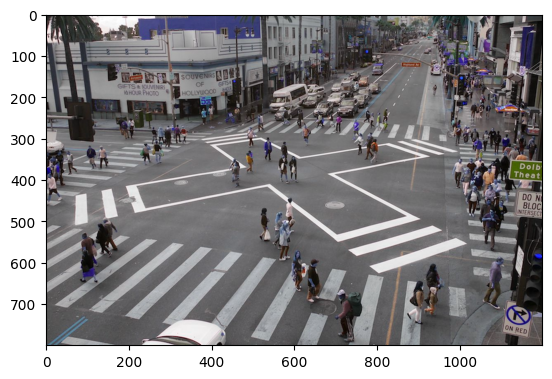

In [4]:
plt.imshow(img)

In [6]:
print(img.shape)
# the image shape
# 800 is the number of rows
# 1200 is the number of columns
# 3 is the color channel
#     It's an RBG value.

# The image is made out of 3 matrixes merged ontop of eachother
# One matrix for each color channel. One Matric for red, one for blue, one for blue
# but we see that the image switches red with blue because the image originally is RGB,
# but OpenCV uses BGR for image color channels, so the colors are switched

(800, 1200, 3)


In [7]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# this generates an image that converts a BGR image to an RGB image.

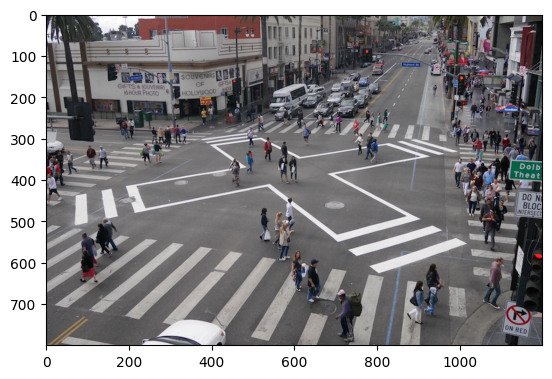

In [8]:
plt.imshow(rgb_img)

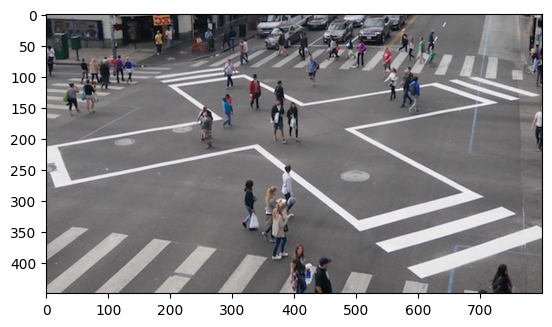

In [10]:
# to get the white cross in the image only, we can crop the image by specifying the row and column range that we want.
cropped_img = rgb_img[200:650, 200:1000]
plt.imshow(cropped_img)
# 200 to 700 is the row range (y-axis) and 200 to 1000 is the column range (x-axis)

In [11]:
# We need to do image processing before computer vision,
# because we should remove noise, crop the image to get the objects of interest only and so on, (ROI = Region of Interest)
# so that computer vision works efficiently

In [12]:
(rgb_img.shape[0] * rgb_img.shape[1]) * rgb_img.shape[2]
# getting the total number of pixels in the origianl image

2880000

In [13]:
# We can convert the image to greyscale.
# That way, the image is made out of only one matrix, and not 3 anymore.
greyscale_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

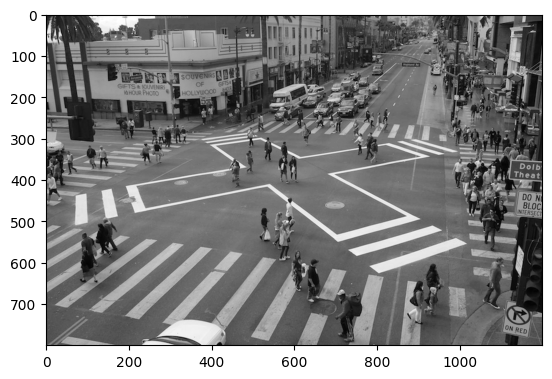

In [14]:
plt.imshow(greyscale_img, cmap='gray')

In [15]:
print(greyscale_img.shape)
# the shape is now 800 rows and 1200 columns.
# we only have one matrix.
# The value in one cell (pixel) is a grayscale value -> [0, 250]

(800, 1200)


In [16]:
# converting an image to grayscale can lead to a loss of information.
# Sometimes that is good.
#   For small sized images and so on
#   But we lose information like traffic light colors and so on.

In [17]:
# We split the image into the 3 sub-matrixes.
Red, Green, Blue = cv2.split(img)

In [18]:
print(Red.shape)
# We see that the Red image matrix is a 2D matrix. because the value of the cell is an R value [0,255] from the "R"GB colos channel.

(800, 1200)


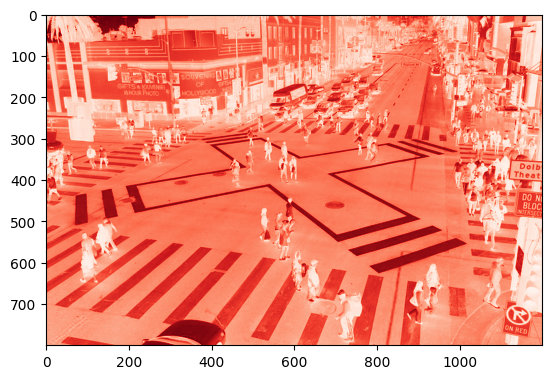

In [19]:
plt.imshow(Red, cmap='Reds')

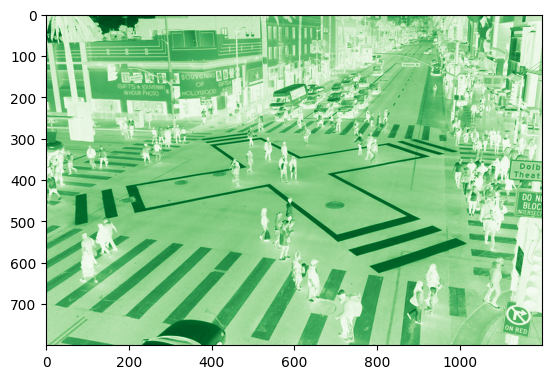

In [20]:
plt.imshow(Green, cmap='Greens')

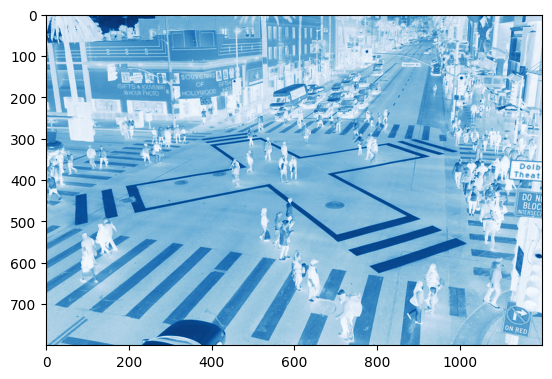

In [21]:
plt.imshow(Blue, cmap='Blues')

In [22]:
merged_image = cv2.merge([Red,Green,Blue])

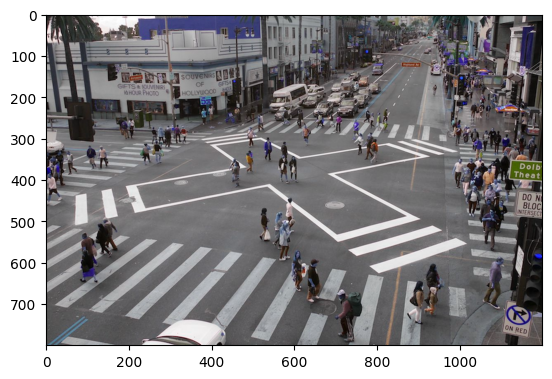

In [23]:
plt.imshow(merged_image)

In [24]:
# Another way to split the image
red=merged_image[:,:,0]

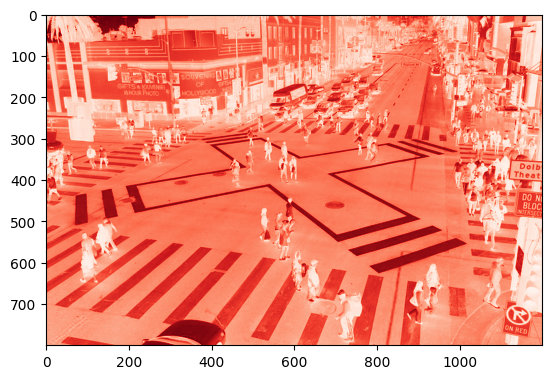

In [25]:
plt.imshow(red, cmap='Reds')

In [26]:
## Difference between binary images and grayscale images

# Binary Images:
# Only white and black colors. [0, 1]

# Greyscale Images:
# Colors have different greyscales ranging from [0, 255]

In [27]:
# We are creating an np array that will represent a binary color image.
# 0 means black and 1 means white
traffic_sign= np.array([
  [0, 0, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 0, 0],
  [0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0]
])

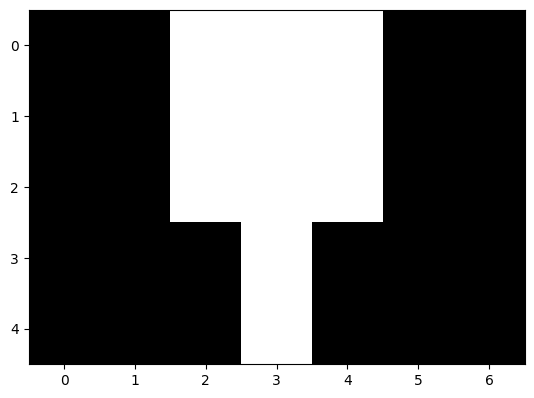

In [28]:
plt.imshow(traffic_sign, cmap='gray')

# Working with Videos

In [29]:
# load the video and save it in a variable
cap = cv2.VideoCapture('road.mp4')

In [30]:
# Library to display videos
from IPython.display import Video

In [31]:
Video("road.mp4", embed=True)

Output hidden; open in https://colab.research.google.com to view.

In [32]:
cap = cv2.VideoCapture('road.mp4')

Frame_list = []   # to save all frames in.

while True:
  # cap.read returns 2 values.
  # a boolean "ret" and the frame "frame"
  # ret is set to false when we finished the video so frame is null
  ret, frame = cap.read()     # read frame
  Frame_list.append(frame)    # save frame into the array

  if not ret:
    print("End of the video")
    break

# "cap.release" is called to release the video capture resources.
# This is important for clean resource management,
# especially if you plan to open another video file or
# perform other operations afterward. It frees up system
# resources associated with the video capture.
cap.release()

# "cv2.destroyAllWindows():" This function is used to close all OpenCV windows
# that might have been opened during the execution of the code.
# If you display frames using cv2.imshow() or other window-related functions,
# calling cv2.destroyAllWindows() ensures that all those windows are closed when the
# code is finished. This is important for preventing potential issues or conflicts with
# other OpenCV code that might run subsequently.
cv2.destroyAllWindows

End of the video


<function destroyAllWindows>

In [33]:
# do the same thing but we will read the first 500 frames only because the code above will take a long time to run

cap = cv2.VideoCapture('road.mp4')

Frame_list = []

i = 0

while i < 500:
  ret, frame = cap.read()
  Frame_list.append(frame)
  i = i + 1

  if not ret:
    print("End of the video")
    break

cap.release()
cv2.destroyAllWindows

<function destroyAllWindows>

In [34]:
print(Frame_list)

[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [8, 8, 8],
        [8, 8, 8],
        [8, 8, 8]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,

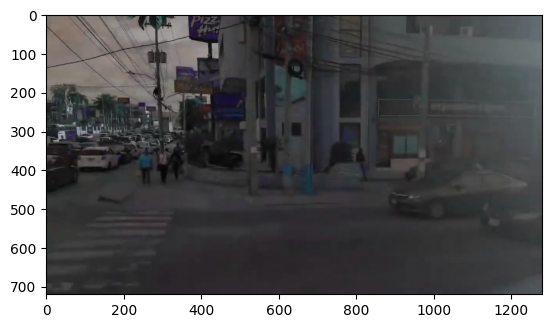

In [35]:
plt.imshow(Frame_list[20])
# 20 is still the first frame because we assume that one second has 25 frames

# Optional Assignment (BONUS)

In [36]:
# yolo detects 10 objects in images:
# humans, trucks, cars, stop lights

In [37]:
!pip install ultralytics
# Ultralytics is a deep learning library that provides a high-level interface
# for working with various computer vision tasks, particularly focusing on object
# detection and segmentation. It is commonly used in the context of deep learning
# projects that involve training and evaluating models for tasks such as image recognition.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [38]:
# You Only Look Once (YOLO) is a popular object detection algorithm that can detect and
# localize multiple objects in an image with high accuracy and speed.
from ultralytics import YOLO

In [39]:
# YOLOv8 is the eighth version of the You Only Look Once (YOLO) object detection algorithm.
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 177MB/s]


In [40]:
results = model.predict(source = "pedestrians.jpg", save=True, conf = 0.2, iou = 0.5)


image 1/1 /content/pedestrians.jpg: 448x640 32 persons, 11 cars, 1 bus, 2 trucks, 4 traffic lights, 3 backpacks, 2918.8ms
Speed: 30.4ms preprocess, 2918.8ms inference, 41.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


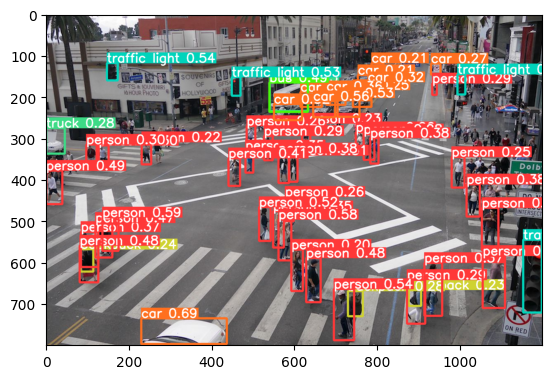

In [41]:
# Plotting results
plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
plt.imshow(plot)

# Assignment

Read a frame every second (every 25 frames) and input it into the YOLO model, to get the output image with the detected objects.

In [ ]:
cap = cv2.VideoCapture('road.mp4')

frames_list = []

i = 1

while True:
  ret, frame = cap.read()
  if (i % 25 == 0):
    frames_list.append(frame)
  i = i + 1

  if not ret:
    print("End of the video")
    break

cap.release()
cv2.destroyAllWindows

End of the video


<function destroyAllWindows>

In [ ]:
print(frames_list)

[array([[[107,  99, 101],
        [ 79,  71,  73],
        [ 53,  45,  47],
        ...,
        [114, 125, 126],
        [114, 125, 126],
        [114, 125, 126]],

       [[117, 109, 111],
        [ 87,  79,  81],
        [ 56,  48,  50],
        ...,
        [114, 125, 126],
        [114, 125, 126],
        [114, 125, 126]],

       [[138, 130, 132],
        [102,  94,  96],
        [ 60,  52,  54],
        ...,
        [114, 125, 126],
        [114, 125, 126],
        [114, 125, 126]],

       ...,

       [[ 58,  58,  58],
        [ 58,  58,  58],
        [ 58,  58,  58],
        ...,
        [ 88,  95,  96],
        [ 89,  96,  97],
        [ 89,  96,  97]],

       [[ 54,  54,  54],
        [ 54,  54,  54],
        [ 54,  54,  54],
        ...,
        [ 89,  96,  97],
        [ 90,  97,  98],
        [ 90,  97,  98]],

       [[ 52,  52,  52],
        [ 52,  52,  52],
        [ 52,  52,  52],
        ...,
        [ 90,  97,  98],
        [ 90,  97,  98],
        [ 91,  98,  99]

In [ ]:
print(len(frames_list))

47


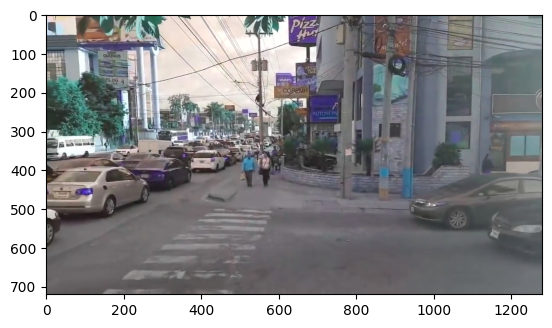

In [ ]:
plt.imshow(frames_list[0])

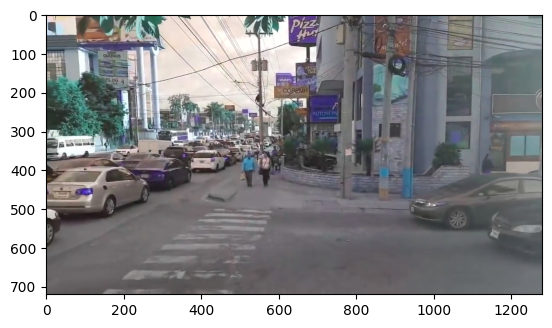

In [ ]:
plt.imshow(frames_list[1])

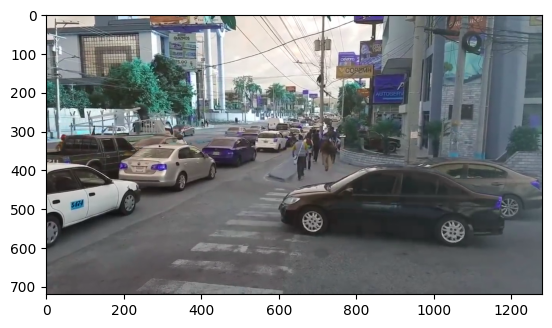

In [ ]:
plt.imshow(frames_list[40])

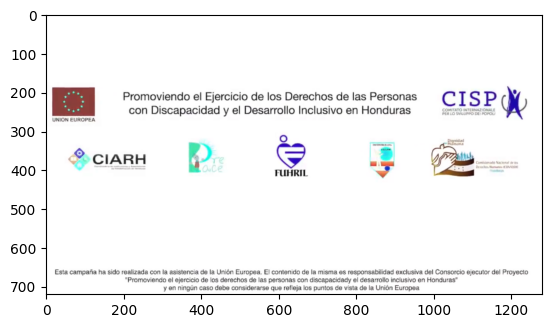

In [ ]:
plt.imshow(frames_list[46])

In [ ]:
del frames_list[41:]

In [ ]:
print(len(frames_list))

41


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")

frames_with_detected_objects = []

for frame in frames_list:
  # Perform YOLO prediction on each frame
  res_frame = model.predict(source=frame, save=True, conf=0.2, iou=0.5)

  # Append the frame with detected objects to the result list
  frames_with_detected_objects.append(res_frame)


0: 384x640 4 persons, 10 cars, 1 truck, 1 traffic light, 1001.2ms
Speed: 2.7ms preprocess, 1001.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2

0: 384x640 4 persons, 17 cars, 2 buss, 2 trucks, 1 traffic light, 982.7ms
Speed: 3.1ms preprocess, 982.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2

0: 384x640 4 persons, 19 cars, 2 trucks, 1 traffic light, 921.4ms
Speed: 3.1ms preprocess, 921.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2

0: 384x640 4 persons, 21 cars, 1 truck, 1 traffic light, 1 potted plant, 915.9ms
Speed: 4.1ms preprocess, 915.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2

0: 384x640 3 persons, 20 cars, 1 truck, 1 traffic light, 1 handbag, 912.1ms
Speed: 5.9ms preprocess, 912.1ms inference, 1.4ms postprocess per image at shape (1, 3,

In [ ]:
print(len(frames_with_detected_objects))

41


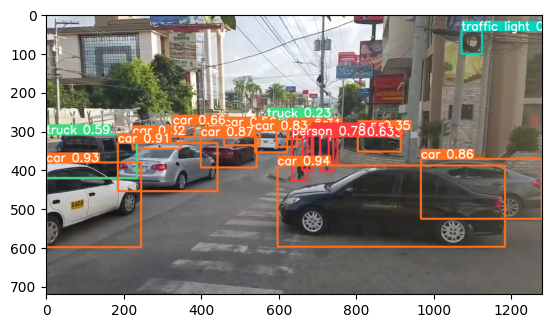

In [ ]:
plot = frames_with_detected_objects[40][0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
plt.imshow(plot)